# Task 4.10 - Part 1.2

## 1.- Importing Libraries & Dataframe 

In [7]:
#importing libraries 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [9]:
# Importing dataframe 

path = r'C:\Users\cmfag\OneDrive\Desktop\Data Analyst Specialist\Achievement 4\02 DATA\Prepared Data'

df_combined_filtered_reduced= pd.read_pickle(os.path.join(path, 'df_combined_filtered_reduced.pkl'))

## 5.- Profiling Customers

### 5.1 Creating new group of categories

In [6]:
# Create 'age_group' as a categorical column
age_conditions = [
    (df_combined_filtered_reduced['age'] >= 18) & (df_combined_filtered_reduced['age'] <= 25),
    (df_combined_filtered_reduced['age'] >= 26) & (df_combined_filtered_reduced['age'] <= 35),
    (df_combined_filtered_reduced['age'] >= 36) & (df_combined_filtered_reduced['age'] <= 45),
    (df_combined_filtered_reduced['age'] >= 46) & (df_combined_filtered_reduced['age'] <= 60),
    (df_combined_filtered_reduced['age'] >= 61)
]
age_labels = ['Young Adult', 'Adult', 'Middle-aged Adult', 'Mature Adult', 'Senior']

df_combined_filtered_reduced['age_group'] = pd.Categorical(
    np.select(age_conditions, age_labels, default='Unknown'),
    categories=['Young Adult', 'Adult', 'Middle-aged Adult', 'Mature Adult', 'Senior', 'Unknown'],
    ordered=True)

# Checking the result
print(df_combined_filtered_reduced['age_group'].value_counts())

# Check memory usage
print(f"Memory usage of 'age_group': {df_combined_filtered_reduced['age_group'].memory_usage(deep=True) / 1024**2:.2f} MB")


age_group
Senior               10121834
Mature Adult          7292034
Adult                 4878742
Middle-aged Adult     4832601
Young Adult           3868278
Unknown                     0
Name: count, dtype: int64
Memory usage of 'age_group': 266.02 MB


In [8]:
# Create 'income_group' as a categorical column
income_conditions = [
    df_combined_filtered_reduced['income'] < 30000,
    (df_combined_filtered_reduced['income'] >= 30000) & (df_combined_filtered_reduced['income'] <= 70000),
    df_combined_filtered_reduced['income'] > 70000
]
income_labels = ['Low Income', 'Middle Income', 'High Income']

df_combined_filtered_reduced['income_group'] = pd.Categorical(
    np.select(income_conditions, income_labels, default='Unknown'),
    categories=['Low Income', 'Middle Income', 'High Income', 'Unknown'],
    ordered=True
)

# Checking the result
print(df_combined_filtered_reduced['income_group'].value_counts())

# Check memory usage
print(f"Memory usage of 'income_group': {df_combined_filtered_reduced['income_group'].memory_usage(deep=True) / 1024**2:.2f} MB")


income_group
High Income      22464265
Middle Income     8335200
Low Income         194024
Unknown                 0
Name: count, dtype: int64
Memory usage of 'income_group': 266.02 MB


In [11]:
#FAMILY-SIZE 

# Define conditions for family size categories
conditions_family = [
    df_combined_filtered_reduced['num_dependents'] <= 1,  # Small family: 0 or 1 dependents
    (df_combined_filtered_reduced['num_dependents'] == 2),  # Middle-size family: 2 dependents
    (df_combined_filtered_reduced['num_dependents'] == 3)  # Large family: 3 dependents
]
# Define the corresponding labels
choices_family = ['Small Family', 'Middle-size Family', 'Large Family']

# Create the 'family_size' column as a categorical variable
df_combined_filtered_reduced['family_size'] = pd.Categorical(
    np.select(conditions_family, choices_family, default='Unknown'),
    categories=['Small Family', 'Middle-size Family', 'Large Family', 'Unknown'],  # Explicit categories
    ordered=True  # Logical ordering
)

# Validate the results
print(df_combined_filtered_reduced['family_size'].value_counts())
print(f"Memory usage of 'family_size': {df_combined_filtered_reduced['family_size'].memory_usage(deep=True) / 1024**2:.2f} MB")



family_size
Small Family          15473312
Large Family           7779638
Middle-size Family     7740539
Unknown                      0
Name: count, dtype: int64
Memory usage of 'family_size': 266.02 MB


In [13]:
# Check the maximum value of 'num_dependents'
print(f"Maximum value in 'num_dependents': {df_combined_filtered_reduced['num_dependents'].max()}")

# Value counts for 'num_dependents'
print(df_combined_filtered_reduced['num_dependents'].value_counts().sort_index())


Maximum value in 'num_dependents': 3
num_dependents
0    7747183
1    7726129
2    7740539
3    7779638
Name: count, dtype: int64


In [15]:
#TIME-PROFILE

# Crear 'time_profile' como columna categórica desde el principio
conditions_time = [
    (df_combined_filtered_reduced['order_dow'] < 5) & (df_combined_filtered_reduced['order_hour_of_day'] < 12),
    (df_combined_filtered_reduced['order_dow'] < 5) & (df_combined_filtered_reduced['order_hour_of_day'] >= 12),
    (df_combined_filtered_reduced['order_dow'] >= 5) & (df_combined_filtered_reduced['order_hour_of_day'] < 12),
    (df_combined_filtered_reduced['order_dow'] >= 5) & (df_combined_filtered_reduced['order_hour_of_day'] >= 12)
]
choices_time = ['Weekday morning shopper', 'Weekday afternoon shopper', 'Weekend morning shopper', 'Weekend afternoon shopper']

# Crear la columna como categórica
df_combined_filtered_reduced['time_profile'] = pd.Categorical(
    np.select(conditions_time, choices_time, default='Unknown'),
    categories=['Weekday morning shopper', 'Weekday afternoon shopper', 'Weekend morning shopper', 'Weekend afternoon shopper', 'Unknown'],  # Definir categorías explícitamente
    ordered=True  # Especificar si tienen un orden lógico
)

# Validation & Memory status
print(df_combined_filtered_reduced['time_profile'].value_counts())

print(f"Memory usage of 'time_profile': {df_combined_filtered_reduced['time_profile'].memory_usage(deep=True) / 1024**2:.2f} MB")

time_profile
Weekday afternoon shopper    14572545
Weekday morning shopper       8088490
Weekend afternoon shopper     5411095
Weekend morning shopper       2921359
Unknown                             0
Name: count, dtype: int64
Memory usage of 'time_profile': 266.02 MB


### Analisis of Department 

In [233]:
print(df_combined_filtered_reduced.columns)

print(df_combined_filtered_reduced ['department'].value_counts())

Index(['order_number', 'order_dow', 'order_hour_of_day', 'department_id',
       'prices', 'busiest_day', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'average_spend', 'spender_flag', 'Customer_frequency',
       'frequency_flag', 'gender', 'state', 'age', 'num_dependents',
       'family_status', 'income', 'Region', 'exclusion_flag', 'age_group',
       'income_group', 'family_size', 'time_profile', 'department',
       'first_profile', 'third_profile', 'second_profile'],
      dtype='object')
department
produce       9079276
Others        7465367
dairy eggs    5177183
snacks        2766406
beverages     2571901
frozen        2121732
pantry        1782705
Name: count, dtype: int64


C:\Users\cmfag\AppData\Local\Temp\ipykernel_8868\3177398381.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



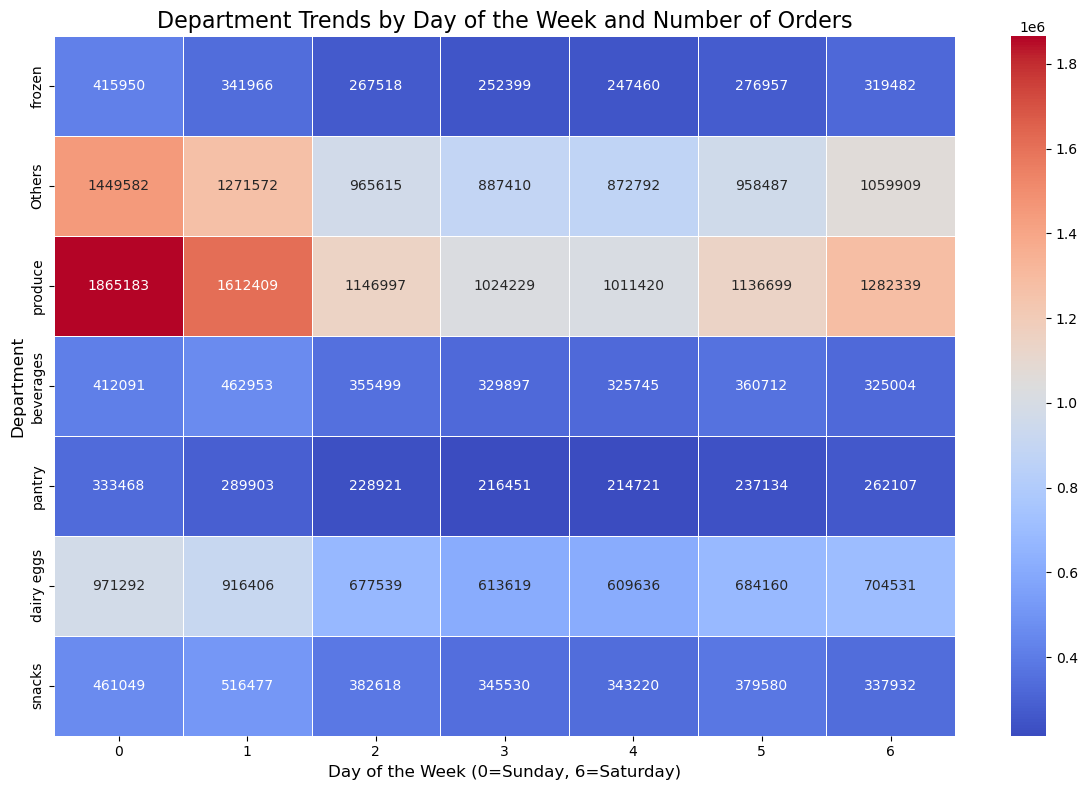

C:\Users\cmfag\AppData\Local\Temp\ipykernel_8868\3177398381.py:17: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



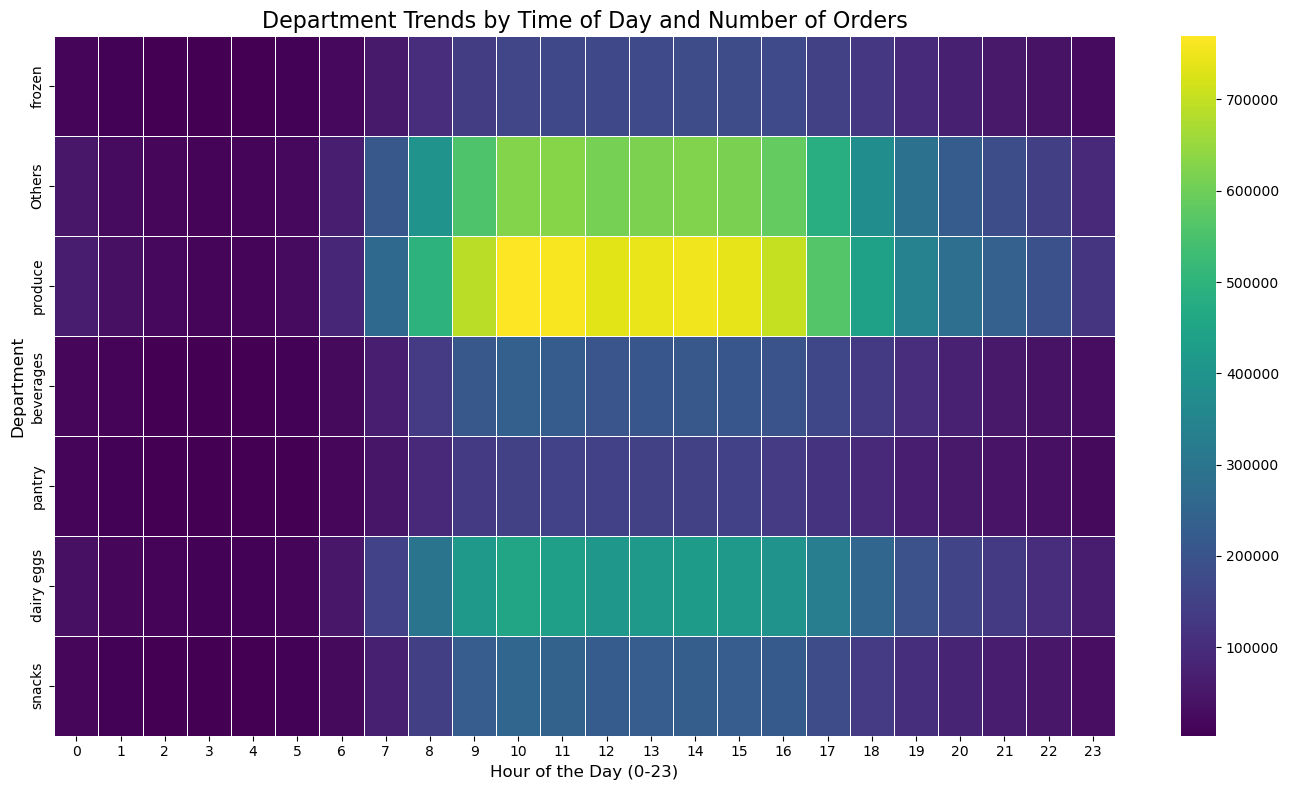

In [243]:
# Group data by order_dow and department
dow_trends = df_combined_filtered_reduced.groupby(['order_dow', 'department']).size().reset_index(name='order_count')

# Pivot the data for a heatmap
dow_pivot = dow_trends.pivot(index='department', columns='order_dow', values='order_count')

# Create a heatmap for Days of the Week
plt.figure(figsize=(12, 8))
sns.heatmap(dow_pivot, cmap='coolwarm', annot=True, fmt=".0f", linewidths=0.5)
plt.title("Department Trends by Day of the Week and Number of Orders", fontsize=16)
plt.xlabel("Day of the Week (0=Sunday, 6=Saturday)", fontsize=12)
plt.ylabel("Department", fontsize=12)
plt.tight_layout()
plt.show()

# Group data by order_hour_of_day and department
hour_trends = df_combined_filtered_reduced.groupby(['order_hour_of_day', 'department']).size().reset_index(name='order_count')

# Pivot the data for a heatmap
hour_pivot = hour_trends.pivot(index='department', columns='order_hour_of_day', values='order_count')

# Create a heatmap for Time of Day
plt.figure(figsize=(14, 8))
sns.heatmap(hour_pivot, cmap='viridis', annot=False, fmt=".0f", linewidths=0.5)
plt.title("Department Trends by Time of Day and Number of Orders", fontsize=16)
plt.xlabel("Hour of the Day (0-23)", fontsize=12)
plt.ylabel("Department", fontsize=12)
plt.tight_layout()
plt.show()


### Insights from Department Analysis

##### Top Departments by Sales: 

The produce department leads in sales with 9,079,276 orders, contributing significantly to the company's revenue.
Dairy & Eggs and Others follow, indicating their importance to the overall business strategy.

##### Analysis of 'Others' Department:

The 'Others' category aggregates departments contributing less than 5% individually to total sales.
Insights reveal substantial contributions from Bakery, Canned Goods, and Deli, emphasizing their hidden potential for growth or specialized campaigns.This will be analyzed below. 

##### Trends by Day of the Week:

Produce and dairy categories experience high order volumes throughout the week, peaking on weekends.
The 'Others' category also sees substantial activity across all days, indicating diverse product demand.
Snacks and beverages demonstrate consistent demand, potentially signaling habitual consumption patterns.

##### Trends by Time of Day:

Most departments, especially Produce and Dairy & Eggs, show peak order activity between 9 AM and 3 PM, likely aligning with customer shopping schedules.
Evening hours see reduced activity, presenting opportunities to target late shoppers through discounts or promotions.

##### Insights for Marketing:

High-performing departments like Produce and Dairy & Eggs should be leveraged in promotions to attract customers during peak hours or retain them on less active days.
The 'Others' category can benefit from targeted campaigns highlighting specific products like Bakery or Canned Goods, which may appeal to niche markets.

##### Recommendations:

Explore cross-selling opportunities by combining top-performing items from Produce and Dairy with low-performing items from Others.
Analyze demographic or regional preferences within these departments to further customize marketing strategies.



### What happens  with Others?

In [241]:
# Define categories that are not part of "Others"
excluded_departments = ['frozen', 'produce', 'snacks', 'beverages', 'dairy eggs', 'pantry']

# Get counts for each department in "Others"
original_departments_in_others = df_combined_filtered_reduced[
    df_combined_filtered_reduced['department'] == 'Others'
]['department_id']

# Calculate the percentage of sales within "Others"
others_percentage_sales = original_departments_in_others.value_counts(normalize=True) * 100

# Calculate the percentage of total sales
total_percentage_sales = original_departments_in_others.value_counts(normalize=False) / len(df_combined_filtered_reduced) * 100

# Create a summary DataFrame
others_summary_table = pd.DataFrame({
    "Department Name": others_percentage_sales.index.map(department_mapping),  # Map department IDs to names
    "Percentage of Sales in Others": others_percentage_sales.values,
    "Percentage of Total Sales": total_percentage_sales.values
})

# Filter out excluded departments from the summary table
others_summary_table = others_summary_table[
    ~others_summary_table["Department Name"].isin(excluded_departments)
]

# Sort by percentage within "Others" (descending)
others_summary_table = others_summary_table.sort_values(by="Percentage of Sales in Others", ascending=False).reset_index(drop=True)

# Display the table
print(others_summary_table)

# Export the table to an Excel file
output_path = r"C:\Users\cmfag\OneDrive\Desktop\Data Analyst Specialist\Achievement 4\04 Analysis\Visualizations\Visualizations"
others_summary_table.to_excel(f"{output_path}/filtered_others_department_sales_summary.xlsx", index=False)



    Department Name  Percentage of Sales in Others  Percentage of Total Sales
0            bakery                      15.013703                   3.616334
1      canned goods                      13.556922                   3.265441
2              deli                      13.446546                   3.238854
3   dry goods pasta                      11.012667                   2.652609
4         household                       9.374730                   2.258081
5      meat seafood                       9.038819                   2.177170
6         breakfast                       8.986162                   2.164487
7     personal care                       5.683659                   1.369017
8            babies                       5.497278                   1.324123
9     international                       3.429048                   0.825951
10          alcohol                       1.937306                   0.466637
11             pets                       1.246556              

#### Comments about Department Category others: 

##### Contributors:

Top: Bakery (15.01%), Canned Goods (13.56%), and Deli (13.44%) are the largest contributors to the "Others" category. They collectively account for over 40% of the sales in "Others", which suggests these departments are still quite significant.

Missed Opportunity: Personal Care (5.68%) and Babies (5.50%) have a notable presence within "Others," yet their total sales percentages are relatively small. These could represent untapped marketing opportunities or areas where customer engagement could be improved.

"Other" Department: The residual category labeled as "Other" accounts for only 0.46% of sales in "Others", confirming that the vast majority of departments in "Others" are clearly identified.

##### Recommendations: 

##### Focus Marketing Efforts on Top Performers:

Since Bakery, Canned Goods, and Deli dominate the "Others" category, tailored promotions or marketing campaigns for these departments might drive further growth.

##### Explore Niche Markets:

Departments like Personal Care, Babies, and Household have moderate shares within "Others." These departments might benefit from specialized campaigns to attract more customers.

##### Reevaluate Smaller Departments:

For departments like Bulk, Pets, and Alcohol, consider analyzing their performance to determine whether to allocate resources for growth or retain them as niche offerings.

##### Investigate the "Missing" Department:

The Missing category accounts for 0.86% of sales in "Others". This likely represents incomplete data or uncategorized entries. It's worth reviewing the source data to ensure that missing values are minimized or better understood.


## 5.2. Who is who? - Creating customer profiles

In [36]:
# Creating First Profile: age_group, income_group y family_size

df_combined_filtered_reduced['first_profile'] = (
    df_combined_filtered_reduced['age_group'].astype(str) + ', ' +
    df_combined_filtered_reduced['income_group'].astype(str) + ', ' +
    df_combined_filtered_reduced['family_size'].astype(str)
)

# Ver el resultado del perfil
print(df_combined_filtered_reduced['first_profile'].value_counts())


first_profile
Senior, High Income, Small Family                       4322888
Mature Adult, High Income, Small Family                 3148994
Senior, High Income, Middle-size Family                 2226688
Senior, High Income, Large Family                       2187547
Middle-aged Adult, High Income, Small Family            1642593
Mature Adult, High Income, Large Family                 1577748
Mature Adult, High Income, Middle-size Family           1526369
Adult, Middle Income, Small Family                      1221600
Adult, High Income, Small Family                        1149176
Young Adult, Middle Income, Small Family                 962952
Young Adult, High Income, Small Family                   950545
Middle-aged Adult, High Income, Large Family             809302
Middle-aged Adult, High Income, Middle-size Family       806723
Middle-aged Adult, Middle Income, Small Family           781031
Senior, Middle Income, Small Family                      686032
Adult, Middle Income, Midd

In [112]:
# # Creating Second Profile: age_group, family_size and time_profile

df_combined_filtered_reduced['second_profile'] = (
    df_combined_filtered_reduced['age_group'].astype(str) + ', ' +
    df_combined_filtered_reduced['family_size'].astype(str) + ', ' +
    df_combined_filtered_reduced['time_profile'].astype(str)
)

# Ver los resultados del segundo perfil
print("\nSecond Profile - Combination of age_group, family_size, y time_profile:")
print(df_combined_filtered_reduced['second_profile'].value_counts())



Second Profile - Combination of age_group, family_size, y time_profile:
second_profile
Senior, Small Family, Weekday afternoon shopper                     2350469
Mature Adult, Small Family, Weekday afternoon shopper               1722875
Senior, Small Family, Weekday morning shopper                       1310195
Senior, Middle-size Family, Weekday afternoon shopper               1218326
Senior, Large Family, Weekday afternoon shopper                     1188285
Middle-aged Adult, Small Family, Weekday afternoon shopper          1155989
Adult, Small Family, Weekday afternoon shopper                      1136980
Mature Adult, Small Family, Weekday morning shopper                  950876
Young Adult, Small Family, Weekday afternoon shopper                 900619
Senior, Small Family, Weekend afternoon shopper                      876818
Mature Adult, Large Family, Weekday afternoon shopper                869092
Mature Adult, Middle-size Family, Weekday afternoon shopper          836901


In [40]:
# Creating third Profile: age_group, family_size and Region


df_combined_filtered_reduced['third_profile'] = (
    df_combined_filtered_reduced['age_group'].astype(str) + ', ' +
    df_combined_filtered_reduced['family_size'].astype(str) + ', ' +
    df_combined_filtered_reduced['Region'].astype(str)
)

# Ver los resultados del tercer perfil
print("\nTercer Perfil - Combinación de age_group, family_size, y Region:")
print(df_combined_filtered_reduced['third_profile'].value_counts())



Tercer Perfil - Combinación de age_group, family_size, y Region:
third_profile
Senior, Small Family, South                         1658215
Senior, Small Family, West                          1267898
Mature Adult, Small Family, South                   1175923
Senior, Small Family, Midwest                       1173041
Mature Adult, Small Family, West                     982938
Senior, Small Family, Northeast                      914759
Mature Adult, Small Family, Midwest                  879388
Senior, Middle-size Family, South                    872243
Senior, Large Family, South                          833870
Middle-aged Adult, Small Family, South               812979
Adult, Small Family, South                           812040
Young Adult, Small Family, South                     667309
Senior, Middle-size Family, West                     664307
Senior, Large Family, West                           655889
Mature Adult, Small Family, Northeast                625421
Middle-aged Adult, S

In [88]:

# Verificar el uso de memoria después de agregar los perfiles
print(f"Tamaño total del DataFrame después de agregar los perfiles: {df_combined_filtered_reduced.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


Tamaño total del DataFrame después de agregar los perfiles: 9340.71 MB


## 5.3 - Analysing customer profiles

## Profile 1

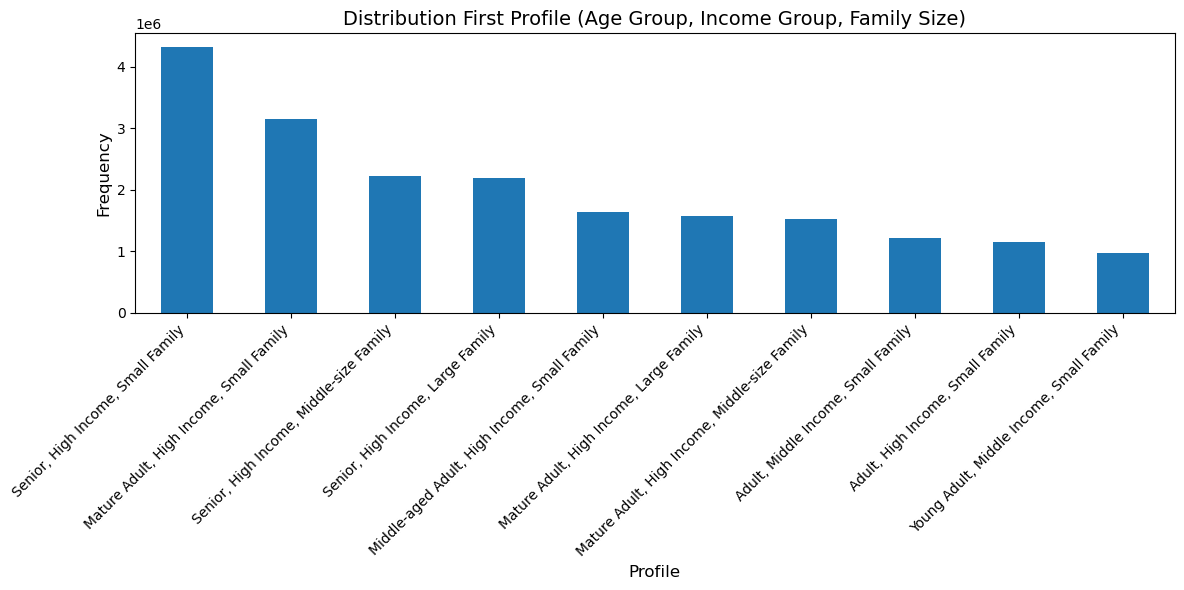

In [46]:
# Counts
first_profile_counts = df_combined_filtered_reduced['first_profile'].value_counts().head(10)

# Graph
plt.figure(figsize=(12, 6))
first_profile_counts.plot(kind='bar')
plt.title('Distribution First Profile (Age Group, Income Group, Family Size)', fontsize=14)
plt.xlabel('Profile', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()


##### Result: considering the information resulting out of the frecuency table, there 3 types of customers that often buy at Instacart are:

##### 1.- Seniors with high income and small families
##### 2.- Mature adults, with high income and small families 
##### 3.- Seniors with high confome and middle-size families


##### Now make sence to find depper insight about this kind of customer, but also identify who are the least common profiles.

In [62]:
print(df_combined_filtered_reduced.columns)

Index(['order_number', 'order_dow', 'order_hour_of_day', 'department_id',
       'prices', 'busiest_day', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'average_spend', 'spender_flag', 'Customer_frequency',
       'frequency_flag', 'gender', 'state', 'age', 'num_dependents',
       'family_status', 'income', 'Region', 'exclusion_flag', 'age_group',
       'income_group', 'family_size', 'time_profile', 'department',
       'first_profile', 'third_profile'],
      dtype='object')


In [70]:

# Create Table
profile_summary = df_combined_filtered_reduced.groupby('first_profile').agg(
    Total_Orders=('order_number', 'sum'),        # Total de órdenes
    Total_Sales=('prices', 'sum'),              # Total de ventas
    Number_of_Customers=('first_profile', 'count')  # Número de perfiles en cada grupo
).reset_index()  # Convertir a un DataFrame

# top 3 prof.
profile_summary_sorted = profile_summary.sort_values(by='Number_of_Customers', ascending=False).head(3)

# Name of the columns
profile_summary_sorted.columns = ["Profile", "Total Orders", "Total Sales", "Number of Customers"]

# Format
profile_summary_sorted_styled = profile_summary_sorted.style.format({
    "Total Orders": "{:,.0f}",
    "Total Sales": "${:,.2f}",
    "Number of Customers": "{:,.0f}"
}).set_caption("Top 3 Customer Profiles by Number of Customers")

# Show
profile_summary_sorted_styled



,Profile,Total Orders,Total Sales,Number of Customers
29,"Senior, High Income, Small Family","77,223,095","$52,847,800.00","4,322,888"
11,"Mature Adult, High Income, Small Family","56,847,949","$40,486,424.00","3,148,994"
28,"Senior, High Income, Middle-size Family","40,622,307","$27,921,940.00","2,226,688"


In [82]:
# Export table

output_path = r"C:\Users\cmfag\OneDrive\Desktop\Data Analyst Specialist\Achievement 4\04 Analysis\Visualizations"
output_file = "Top_3_Customer_Profiles.xlsx"

# Save
profile_summary_sorted.to_excel(f"{output_path}/{output_file}", index=False)

print(f"Saved {output_path}/{output_file}")


Saved C:\Users\cmfag\OneDrive\Desktop\Data Analyst Specialist\Achievement 4\04 Analysis\Visualizations/Top_3_Customer_Profiles.xlsx


In [84]:
# Least Active Customers Profile

# Grouping
least_profiles_summary = (
    df_combined_filtered_reduced.groupby('first_profile')
    .agg(
        Total_Sales=('prices', 'sum'),
        Total_Orders=('order_number', 'nunique'),
        Number_of_Customers=('first_profile', 'size')
    )
    .sort_values(by='Total_Sales', ascending=True)  # Ordenar por ventas totales (de menor a mayor)
    .head(3)  # Seleccionar los 3 perfiles con menor actividad
    .reset_index()  # Restablecer el índice
)

# Format
least_profiles_summary_styled = least_profiles_summary.style.format({
    "Total_Sales": "{:,.2f}",
    "Total_Orders": "{:.0f}",
    "Number_of_Customers": "{:.0f}"
}).set_properties(**{
    'text-align': 'center',
    'font-family': 'Arial',
    'background-color': '#f7f7f7'
}).set_table_styles([{
    'selector': 'th',
    'props': [('text-align', 'center'), ('font-size', '12pt'), ('background-color', '#d3d3d3')]
}]).set_caption("Summary of Least Active Customer Profiles")

# Show result
least_profiles_summary_styled


,first_profile,Total_Sales,Total_Orders,Number_of_Customers
0,"Mature Adult, Low Income, Middle-size Family","7,952.70",23,1200
1,"Mature Adult, Low Income, Large Family","8,466.20",47,1313
2,"Mature Adult, Low Income, Small Family","14,898.40",99,2302


In [86]:
# Export tableoutput_path = r"C:\Users\cmfag\OneDrive\Desktop\Data Analyst Specialist\Achievement 4\04 Analysis\Visualizations"
output_file = "least_profile_summary_table.xlsx"

# Save
profile_summary_sorted.to_excel(f"{output_path}/{output_file}", index=False)

print(f"Saved {output_path}/{output_file}")


Saved C:\Users\cmfag\OneDrive\Desktop\Data Analyst Specialist\Achievement 4\04 Analysis\Visualizations/least_profile_summary_table.xlsx


In [88]:
# How many combinations are in 'first_profile'?
unique_first_profiles = df_combined_filtered_reduced['first_profile'].nunique()

print(f" The number of unique combinations between age_group, income_group y family_size defined as 'first_profile' is: {unique_first_profiles}")


 The number of unique combinations between age_group, income_group y family_size defined as 'first_profile' is: 45


In [106]:
print(df_combined_filtered_reduced.columns)

Index(['order_number', 'order_dow', 'order_hour_of_day', 'department_id',
       'prices', 'busiest_day', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'average_spend', 'spender_flag', 'Customer_frequency',
       'frequency_flag', 'gender', 'state', 'age', 'num_dependents',
       'family_status', 'income', 'Region', 'exclusion_flag', 'age_group',
       'income_group', 'family_size', 'time_profile', 'department',
       'first_profile', 'third_profile'],
      dtype='object')


C:\Users\cmfag\AppData\Local\Temp\ipykernel_8868\2454903786.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_scatter = df_combined_filtered_reduced.groupby(['age_group', 'family_size']).agg(


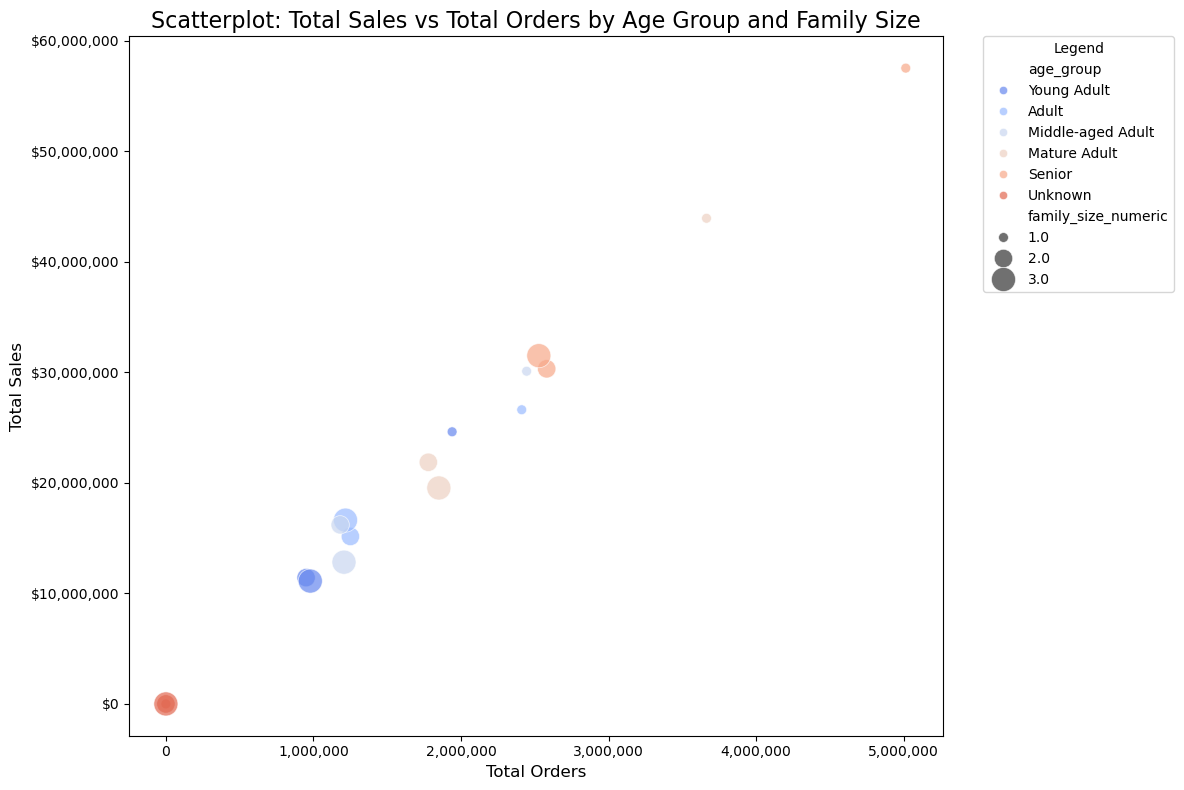

In [110]:
# Aggregate total sales by `order_number` for visualization
df_scatter = df_combined_filtered_reduced.groupby(['age_group', 'family_size']).agg(
    Total_Sales=('prices', 'sum'),
    Total_Orders=('order_number', 'count')
).reset_index()

# Map family sizes to numeric values for bubble sizes
size_mapping = {'Small Family': 1, 'Middle-size Family': 2, 'Large Family': 3}
df_scatter['family_size_numeric'] = df_scatter['family_size'].map(size_mapping)

# Create the scatter plot
plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(
    data=df_scatter,
    x='Total_Orders',  # Use total orders for x-axis
    y='Total_Sales',   # Total sales for y-axis
    hue='age_group',
    size='family_size_numeric',
    sizes=(50, 300),
    palette='coolwarm',
    alpha=0.7
)

# Labels and title
plt.title("Scatterplot: Total Sales vs Total Orders by Age Group and Family Size", fontsize=16)
plt.xlabel("Total Orders", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)

# Improve axis format
scatter_plot.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{int(x):,}'))
scatter_plot.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, loc: f'${int(y):,}'))

# Legend and layout
plt.legend(title="Legend", loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0)
plt.tight_layout()

# Save plot to the specified directory
output_file = os.path.join(output_path, 'scatterplot_sales_vs_orders.png')
plt.savefig(output_file, bbox_inches='tight', dpi=300)

# Show plot
plt.show()


###  Conclusion to First Profile : 

####  Scatterplot: Total Sales vs Number of Customers by Age Group and Family Size

The "Senior" and "Mature Adult" profiles generate the highest sales, likely due to higher purchasing power (indicated by "High Income") and frequent purchases. Profiles such as "Young Adult" have a smaller impact in terms of total sales and customer numbers.

Profiles with higher sales tend to fall within the high-income and mature age categories. This suggests a marketing strategy focused on these groups to maximize revenue.

#### Most Active Customer Profiles and Profile Distribution of the First Group
Observations: The profiles with the highest sales and total orders are:

Senior, High Income, Small Family
Mature Adult, High Income, Small Family
Senior, High Income, Middle-size Family

These profiles have a disproportionate impact on total revenue, indicating that small households with high incomes are the main customers.
Profiles with medium income and small families also appear with moderate frequency, though they generate fewer sales.

Focusing on these profiles can help design loyalty strategies, such as loyalty discounts or personalized packages.
While creating a plan in for reinforce the sales to profiles with medium income and small families would also help in medium long term increasing sales and ensuring keeping the customers. 

#### Least Active Customer Profiles
Observations: The least active profiles share common characteristics, such as low income and larger family sizes:

- Mature Adult, Low Income, Middle-size Family
- Mature Adult, Low Income, Large Family

These groups show low order counts and fewer customers, making them a challenge for marketing.
Although less profitable, these groups could benefit from targeted promotions, such as discounts on essential products or incentives to increase their activity, which could bring an increase in the rotation of specific products. A fundamental question in this case, would be what is the target customer to developt in the future and also what is the positioning of Intacart in the market compered to the competition. 

### Profile 1 and Department Preferences 

C:\Users\cmfag\AppData\Local\Temp\ipykernel_8868\3763161540.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



<Figure size 640x480 with 0 Axes>

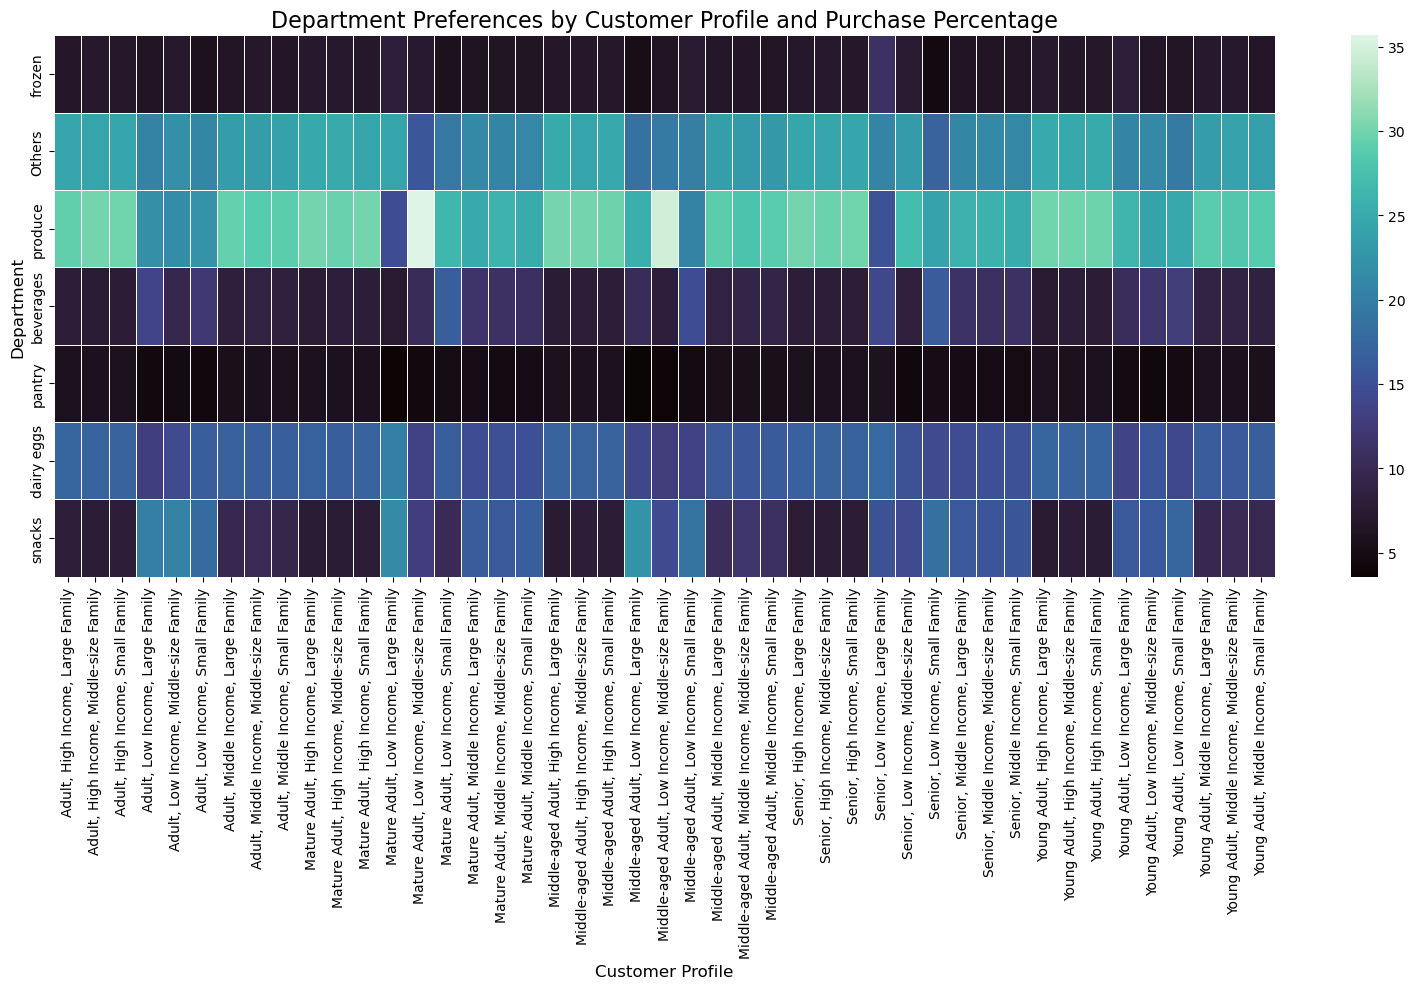

In [276]:
# Group data by first_profile and department
profile_department = df_combined_filtered_reduced.groupby(['first_profile', 'department']).size().reset_index(name='order_count')

# Calculate percentage of orders within each profile
profile_department['percentage'] = profile_department.groupby('first_profile')['order_count'].transform(lambda x: (x / x.sum()) * 100)

# Pivot the data for visualization
profile_pivot = profile_department.pivot(index='department', columns='first_profile', values='percentage')

# Save the heatmap
output_path = r"C:\\Users\\cmfag\\OneDrive\\Desktop\\Data Analyst Specialist\\Achievement 4\\04 Analysis\\Visualizations\\Visualizations"
plt.savefig(
    f"{output_path}\\department_preferences_by_customer_profile_percentage.png",
    format='png',
    dpi=300,
    bbox_inches='tight'
)

# Save the heatmap
output_path = r"C:\Users\cmfag\OneDrive\Desktop\Data Analyst Specialist\Achievement 4\04 Analysis\Visualizations\Visualizations"
plt.savefig(f"{output_path}/Department_preferences_by_customer_profile_purchase_precentage.png", dpi=300)


# Create a heatmap for department preferences by profile
plt.figure(figsize=(16, 10))
sns.heatmap(profile_pivot, cmap='mako', annot=False, linewidths=0.5)
plt.title("Department Preferences by Customer Profile and Purchase Percentage", fontsize=16)
plt.xlabel("Customer Profile", fontsize=12)
plt.ylabel("Department", fontsize=12)
plt.tight_layout()
plt.show()


#### Key Observations:

##### Department related

Produce: Almost all customer profiles consistently favor the produce department (darker color). This makes it the most popular department across profiles.

Dairy & Eggs: This department also sees significant usage across profiles, but to a lesser extent than produce. Profiles with smaller families tend to favor it slightly more.

Others: The "Others" category includes less popular departments, and its usage varies widely across profiles. It sees more prominence in middle-income families.

Frozen and Snacks: These departments are more favored by younger profiles and families with dependents.

High-Income Families: Tend to favor a mix of "produce," "dairy eggs," and "beverages."

#### Insights:

##### Profile-Based Marketing: 

Profiles with higher incomes and smaller families seem to focus on essentials like produce and dairy.
Profiles with larger families lean towards cost-effective options like "frozen" or "snacks."
 
##### Targeting Strategies: 

Departments like "Others" or "Pantry" could benefit from promotions targeting specific profiles with lower engagement in those areas.
 
##### Key Focus Departments:

Produce and dairy eggs are universally popular, making them central to any marketing or discount campaigns.

## Profile 2 

C:\Users\cmfag\AppData\Local\Temp\ipykernel_8868\1258693045.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


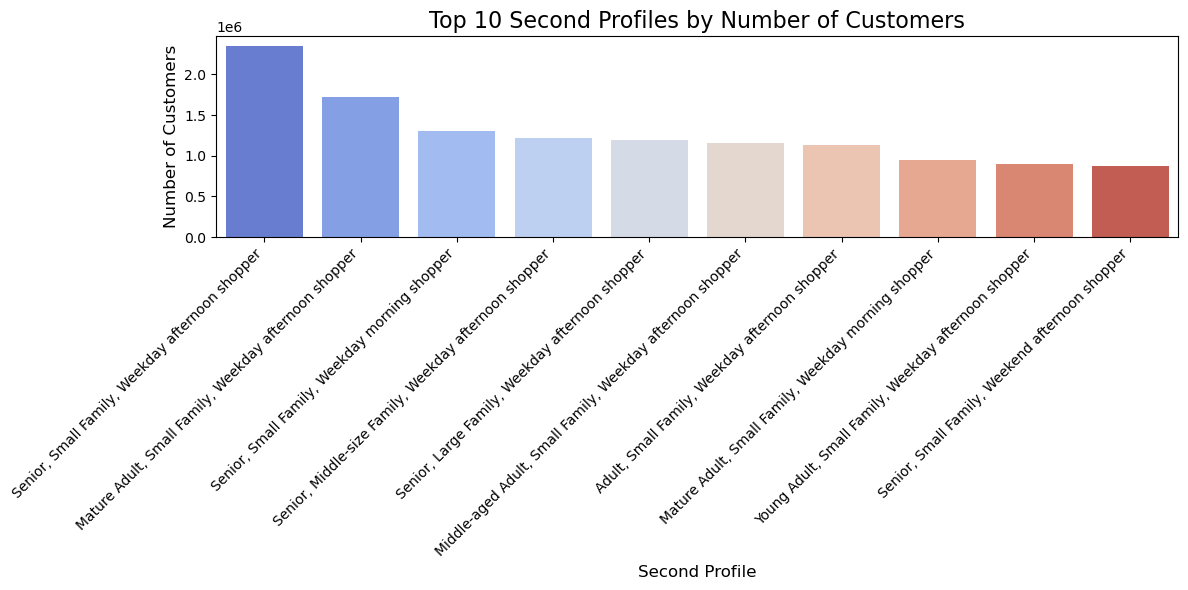

In [119]:
# Aggregate metrics for the second profile
second_profile_summary = df_combined_filtered_reduced.groupby('second_profile').agg(
    Total_Sales=('prices', 'sum'),
    Total_Orders=('order_number', 'count'),
    Number_of_Customers=('Customer_frequency', 'count')
).reset_index()

# Sort profiles by the number of customers
second_profile_summary = second_profile_summary.sort_values(by='Number_of_Customers', ascending=False)

# Display the summary table
second_profile_summary

# Selecting the top 10 profiles by customer count
top_10_second_profiles = second_profile_summary.head(10)

# Create a bar chart for the top 10 profiles
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_10_second_profiles,
    x='second_profile',
    y='Number_of_Customers',
    palette='coolwarm'
)
plt.title('Top 10 Second Profiles by Number of Customers', fontsize=16)
plt.xlabel('Second Profile', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save and display the plot
plt.savefig('second_profile_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


C:\Users\cmfag\AppData\Local\Temp\ipykernel_8868\642102191.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_combined_filtered_reduced.groupby(['order_hour_of_day', 'frequency_flag'])['order_number']


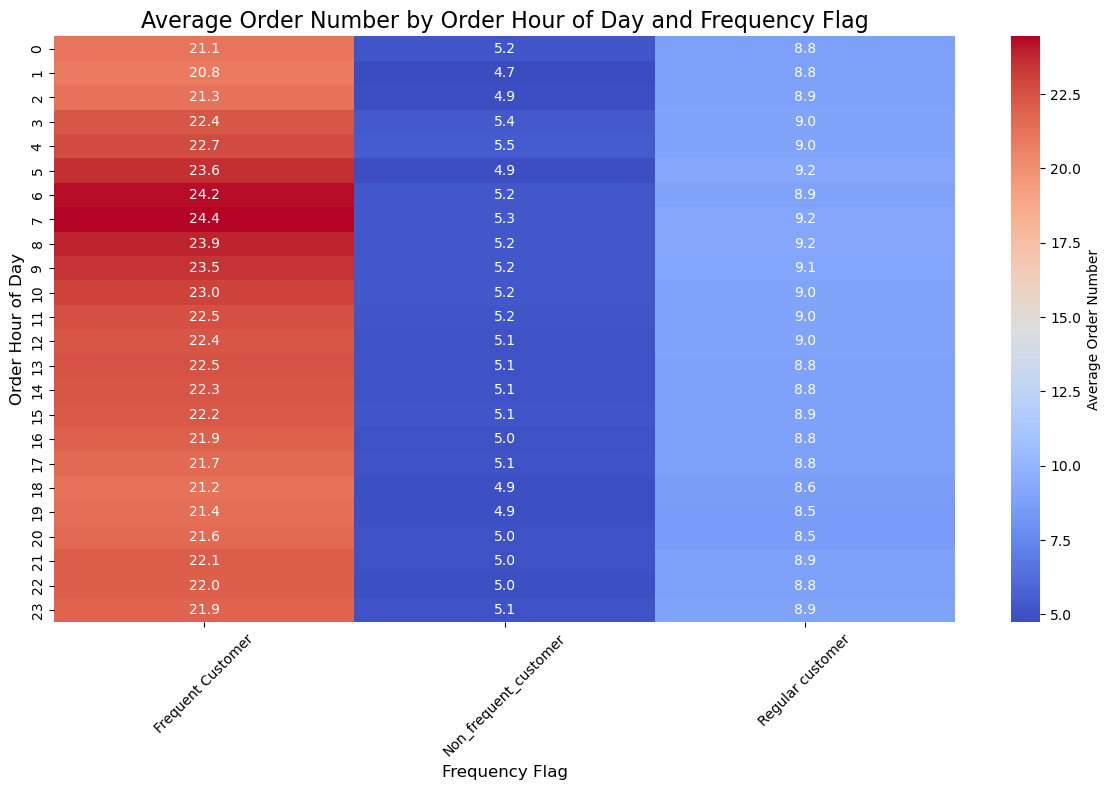

In [121]:

# Group data to analyze the average order number per hour of day, segmented by frequency flag
heatmap_data = (
    df_combined_filtered_reduced.groupby(['order_hour_of_day', 'frequency_flag'])['order_number']
    .mean()
    .unstack()
)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".1f",
    cmap="coolwarm",
    cbar_kws={'label': 'Average Order Number'}
)
plt.title("Average Order Number by Order Hour of Day and Frequency Flag", fontsize=16)
plt.xlabel("Frequency Flag", fontsize=12)
plt.ylabel("Order Hour of Day", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Save the heatmap
output_path = r"C:\Users\cmfag\OneDrive\Desktop\Data Analyst Specialist\Achievement 4\04 Analysis\Visualizations\Visualizations"
plt.savefig(f"{output_path}/order_distribution_heatmap.png", dpi=300)

# Show the heatmap
plt.show()


C:\Users\cmfag\AppData\Local\Temp\ipykernel_8868\4117731917.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_combined_filtered_reduced.groupby(['order_hour_of_day', 'age_group'])['order_number']


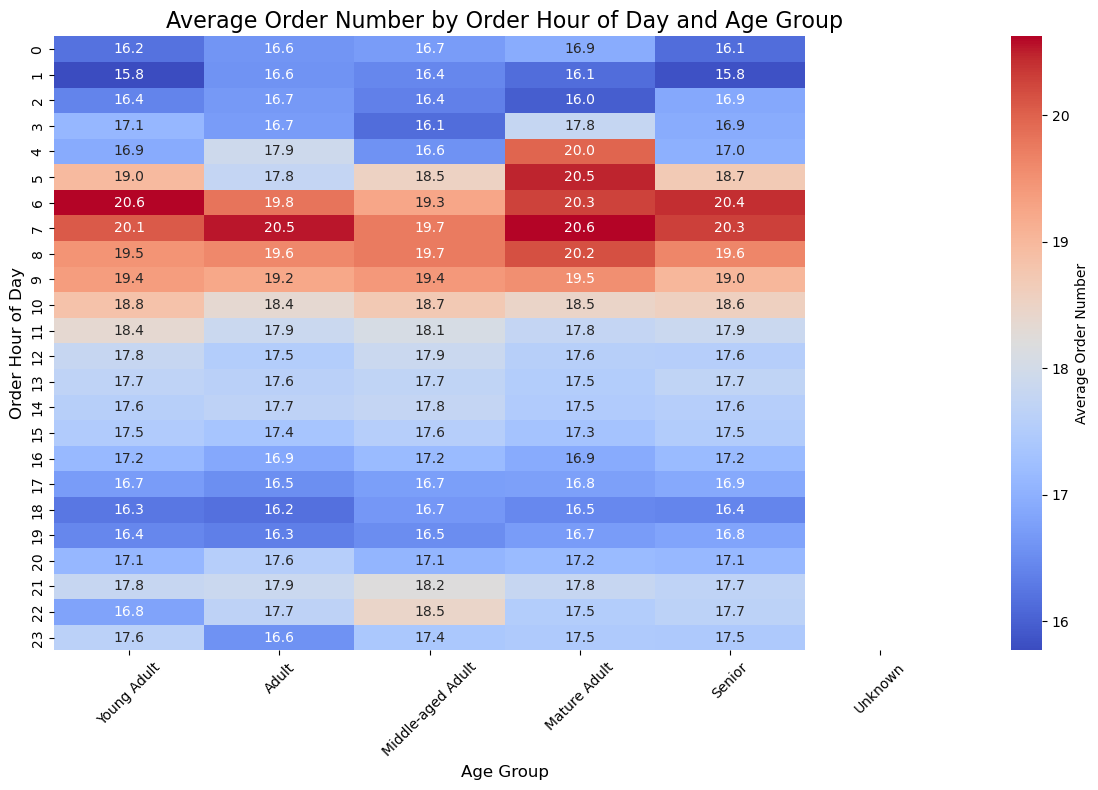

In [123]:
# Group data to analyze the average order number per hour of day, segmented by age group
heatmap_data_age = (
    df_combined_filtered_reduced.groupby(['order_hour_of_day', 'age_group'])['order_number']
    .mean()
    .unstack()
)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data_age,
    annot=True,
    fmt=".1f",
    cmap="coolwarm",
    cbar_kws={'label': 'Average Order Number'}
)
plt.title("Average Order Number by Order Hour of Day and Age Group", fontsize=16)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Order Hour of Day", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Save the heatmap
output_path = r"C:\Users\cmfag\OneDrive\Desktop\Data Analyst Specialist\Achievement 4\04 Analysis\Visualizations\Visualizations"
plt.savefig(f"{output_path}/order_distribution_age_group_heatmap.png", dpi=300)

# Show the heatmap
plt.show()


### Conclusions: 


#### Order Number by Order Hour of Day and Frequency Flag

Frequent Customers:

They place the highest number of orders during the early mornings (around 6-9 am).
The evening and late-night hours see significantly fewer orders from this group.

Non-Frequent and Regular Customers:
These customers show a more even distribution across the day, with no specific peak in the early morning.


#### Order Number by Order Hour of Day and Age Group

Morning Peaks:

Mature Adults and Seniors consistently make the most orders during the early morning hours (6-9 am).
Younger Adults and Adults, while also active in the mornings, show slightly less concentrated ordering behavior compared to older groups.

Age-Driven Preferences:

Younger Adults show less differentiation throughout the day compared to older groups.
Seniors seem to have a significant drop in activity after the early afternoon, likely reflecting lifestyle patterns.

#### Second Profile by Top 10 Profiles

Dominance of Weekday Afternoon Shoppers:
Senior, Small Family, Weekday Afternoon Shopper appears as the top profile, followed by Mature Adult, Small Family shoppers.
Weekday Afternoon Shoppers dominate across all family sizes and age groups.

Weekend Shoppers:
Weekend shoppers are relatively underrepresented in the top profiles, suggesting less shopping activity during weekends overall.

#### Overall Insights:

Time of Day Influence:
Seniors and Mature Adults have clear shopping preferences in the early morning, aligning with their lifestyle.
Frequent customers shop earlier in the day, while non-frequent customers spread their activity throughout the day.

#### Customer Profiles:

Profiles combining senior and mature adults in small family setups dominate order counts and sales.
Weekday Afternoon shopping behavior is a key pattern to focus on when targeting marketing campaigns.

#### Actionable Insights for Marketing:

Promotions and campaigns aimed at seniors and mature adults should target early mornings, especially during weekdays.
Family-oriented promotions should prioritize small and middle-size families.
For less frequent shoppers, campaigns can be optimized for later hours to boost engagement.

## Profile 3

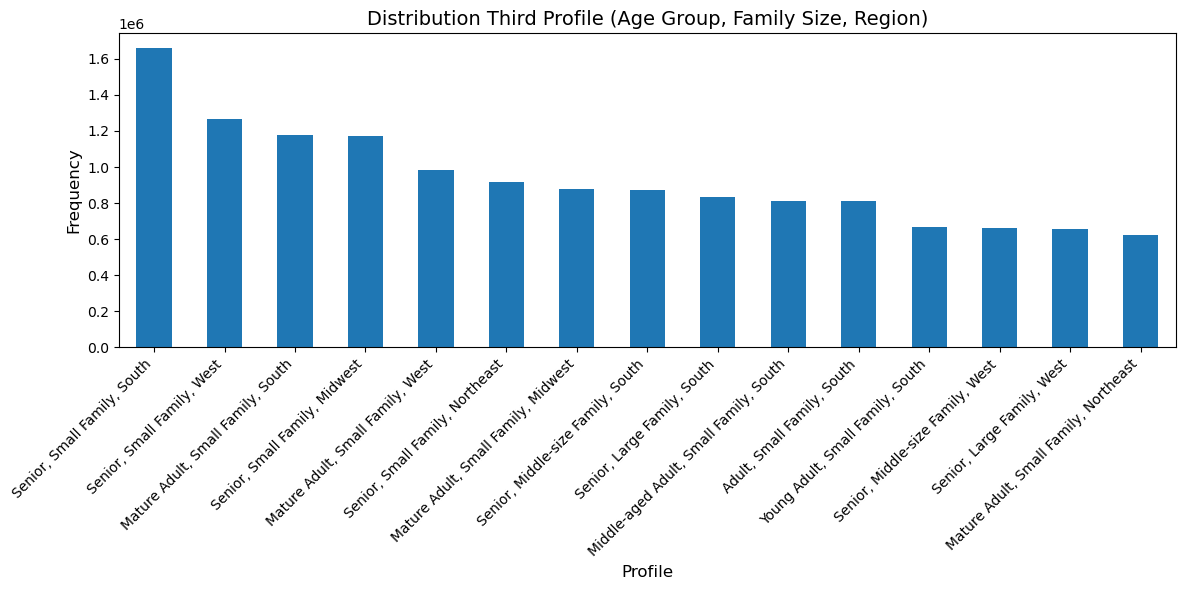

In [195]:
# Count frequencies for the third profile
third_profile_counts = df_combined_filtered_reduced['third_profile'].value_counts().head(15)

# Create a bar chart for the third profile
plt.figure(figsize=(12, 6))
third_profile_counts.plot(kind='bar')
plt.title('Distribution Third Profile (Age Group, Family Size, Region)', fontsize=14)
plt.xlabel('Profile', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()


output_path = r"C:\Users\cmfag\OneDrive\Desktop\Data Analyst Specialist\Achievement 4\04 Analysis\Visualizations"
plt.savefig(f"{output_path}/distribution_third_profile.png", dpi=300)

# Show the graph
plt.show()


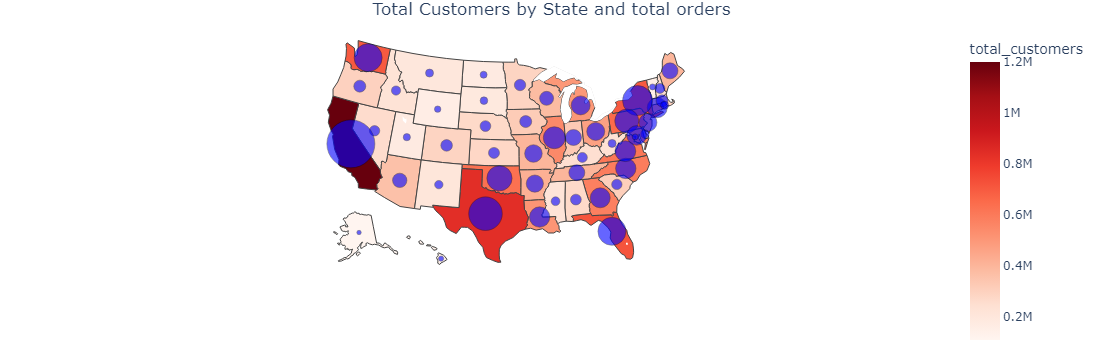

In [278]:
#Creating a map 


import plotly.express as px
import plotly.graph_objects as go

# Create the state summary DataFrame
state_summary = pd.DataFrame({
    'state': ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire',
              'Rhode Island', 'Vermont', 'New Jersey', 'New York',
              'Pennsylvania', 'Illinois', 'Indiana', 'Michigan', 'Ohio',
              'Wisconsin', 'Iowa', 'Kansas', 'Minnesota', 'Missouri',
              'Nebraska', 'North Dakota', 'South Dakota', 'Delaware', 'Florida',
              'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'West Virginia',
              'Arkansas', 'Louisiana', 'Oklahoma', 'Texas', 'Arizona', 'Colorado',
              'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming',
              'Alaska', 'California', 'Hawaii', 'Oregon', 'Washington',
              'District of Columbia', 'Alabama', 'Kentucky', 'Mississippi', 'Tennessee'],
    'total_customers': [500000, 400000, 300000, 250000, 200000, 150000, 450000, 700000,
                        650000, 550000, 330000, 500000, 470000, 380000, 320000, 280000,
                        290000, 400000, 270000, 180000, 190000, 210000, 720000,
                        580000, 560000, 590000, 310000, 610000, 240000,
                        420000, 510000, 630000, 840000, 360000, 290000,
                        230000, 200000, 260000, 210000, 180000, 160000,
                        110000, 1200000, 130000, 300000, 700000,
                        150000, 270000, 250000, 220000, 400000],
    'total_orders': [10000, 8000, 6000, 5000, 4000, 3000, 9000, 15000,
                     12000, 11000, 8000, 9500, 9000, 7000, 6000, 5500,
                     5700, 8800, 5400, 3500, 3800, 4100, 14000,
                     10000, 9800, 10200, 5200, 10400, 4000,
                     8600, 10200, 12600, 16800, 7200, 5800,
                     4600, 4000, 5200, 4200, 3600, 3200,
                     2200, 24000, 2600, 6000, 14000,
                     3000, 5400, 5000, 4400, 8000]
})

# Map state names to abbreviations
state_summary['state_abbr'] = state_summary['state'].map({
    'Connecticut': 'CT', 'Maine': 'ME', 'Massachusetts': 'MA', 'New Hampshire': 'NH', 'Rhode Island': 'RI',
    'Vermont': 'VT', 'New Jersey': 'NJ', 'New York': 'NY', 'Pennsylvania': 'PA', 'Illinois': 'IL',
    'Indiana': 'IN', 'Michigan': 'MI', 'Ohio': 'OH', 'Wisconsin': 'WI',
    'Iowa': 'IA', 'Kansas': 'KS', 'Minnesota': 'MN', 'Missouri': 'MO',
    'Nebraska': 'NE', 'North Dakota': 'ND', 'South Dakota': 'SD', 'Delaware': 'DE', 'Florida': 'FL',
    'Georgia': 'GA', 'Maryland': 'MD', 'North Carolina': 'NC', 'South Carolina': 'SC', 'Virginia': 'VA',
    'West Virginia': 'WV', 'Arkansas': 'AR', 'Louisiana': 'LA', 'Oklahoma': 'OK', 'Texas': 'TX',
    'Arizona': 'AZ', 'Colorado': 'CO', 'Idaho': 'ID', 'Montana': 'MT', 'Nevada': 'NV', 'New Mexico': 'NM',
    'Utah': 'UT', 'Wyoming': 'WY', 'Alaska': 'AK', 'California': 'CA', 'Hawaii': 'HI', 'Oregon': 'OR',
    'Washington': 'WA', 'District of Columbia': 'DC', 'Alabama': 'AL', 'Kentucky': 'KY', 'Mississippi': 'MS',
    'Tennessee': 'TN'
})

# Create a choropleth map
fig = px.choropleth(
    state_summary,
    locations='state_abbr',
    locationmode="USA-states",
    color='total_customers',
    hover_name='state',
    hover_data=['total_customers', 'total_orders'],
    color_continuous_scale="Reds",
    scope="usa",
    title="Total Customers by State and total orders"
)

# Add bubble overlays for order numbers
fig.add_trace(go.Scattergeo(
    locationmode='USA-states',
    locations=state_summary['state_abbr'],
    text=state_summary['state'] + '<br>Total Orders: ' + state_summary['total_orders'].astype(str),
    marker=dict(
        size=state_summary['total_orders'] / 500,  # Adjust bubble size
        color='blue',
        opacity=0.6,
        line=dict(width=0.5, color='black')
    ),
    name='Total Orders (Bubbles)'  # Name for the legend
))

# Adjust layout for better visualization
fig.update_layout(
    geo=dict(
        scope='usa',
        projection=go.layout.geo.Projection(type='albers usa'),
        showland=True,
        landcolor="lightgray",
    ),
    legend=dict(
        title="Legend",
        x=0.8,  # Position to the right
        y=0.5,  # Center vertically
        font=dict(size=12),
    ),
    margin={"r":10,"t":30,"l":10,"b":10},
    title=dict(x=0.5)  # Center title
)

# Show the map
fig.show()


In [179]:
#save the graph

In [177]:
pip install -U kaleido

Note: you may need to restart the kernel to use updated packages.


In [181]:
# Save the map as a PNG file
fig.write_image(r"C:\Users\cmfag\OneDrive\Desktop\Data Analyst Specialist\Achievement 4\04 Analysis\Visualizations\Visualizations\total_customers_by_state.png", scale=2)


ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


### Conclusion 

#### Geographic Distribution of Customers:

The map visualization highlights the distribution of customers across states. States like Texas, California, and Florida have a higher density of customers, as seen from the intensity of the color and size of the bubbles.

Larger bubbles represent states with higher total order volumes, and their locations align with population-dense regions, reinforcing their market potential for targeted marketing strategies.

#### Profile-Based Regional Analysis:

The bar graph for the third profile (combining age group, family size, and region) indicates that the South region with "Seniors, Small Families" dominates the customer count.

The West region follows closely with "Mature Adults, Small Families," showcasing a diverse customer base in this area, possibly due to lifestyle differences.

#### Demographic Preferences:

Seniors with Small Families appear consistently in the top profiles across regions, suggesting they form a key customer demographic. This insight could guide product targeting and marketing strategies specifically designed for this group.

#### Marketing Opportunities:

For states and regions with lower order volumes or customer densities, such as North Dakota or Vermont, targeted promotional campaigns could help engage potential customers and balance regional sales performance.

#### Recommendations:

Focus Marketing Efforts: Concentrate marketing resources in states and regions with high customer and order densities while also experimenting with strategies to penetrate less-dense areas.

Age-Group-Specific Campaigns: Develop tailored campaigns for "Seniors, Small Families" in regions like the South and West. For other regions, identify secondary profiles to address diverse customer needs.

Utilize Profiles for Segmentation: The third profile analysis is instrumental for segmenting customers effectively, helping to align product recommendations with regional and demographic trends.


## 6.-Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [280]:
# Group by customer profiles (e.g., first_profile) and aggregate variables
profile_agg = df_combined_filtered_reduced.groupby('first_profile').agg({
    'order_number': ['max', 'min', 'mean'],  # Usage frequency
    'prices': ['max', 'min', 'mean'],        # Expenditure
    'average_spend': ['max', 'min', 'mean']  # Example additional metric
}).reset_index()

# Rename the columns for clarity
profile_agg.columns = [
    'Profile',
    'Max Orders', 'Min Orders', 'Mean Orders',
    'Max Expenditure', 'Min Expenditure', 'Mean Expenditure',
    'Max Avg Spend', 'Min Avg Spend', 'Mean Avg Spend'
]

# Sort by a meaningful metric (e.g., 'Max Expenditure') for better readability
profile_agg = profile_agg.sort_values(by='Max Expenditure', ascending=False)

# Display the aggregated data
print("Aggregated Customer Profiles:")
print(profile_agg)

# Save the aggregated data to a CSV file
output_path = r"C:\Users\cmfag\OneDrive\Desktop\Data Analyst Specialist\Achievement 4\04 Analysis\Visualizations\AggregatedProfiles.csv"
profile_agg.to_csv(output_path, index=False)

print(f"Aggregated data saved to {output_path}")





Aggregated Customer Profiles:
                                              Profile  Max Orders  Min Orders  \
0                    Adult, High Income, Large Family          99           1   
11            Mature Adult, High Income, Small Family          99           1   
27                  Senior, High Income, Large Family          99           1   
1              Adult, High Income, Middle-size Family          99           1   
28            Senior, High Income, Middle-size Family          99           1   
20       Middle-aged Adult, High Income, Small Family          99           1   
19  Middle-aged Adult, High Income, Middle-size Fa...          99           1   
18       Middle-aged Adult, High Income, Large Family          99           1   
29                  Senior, High Income, Small Family          99           1   
36             Young Adult, High Income, Large Family          99           1   
37       Young Adult, High Income, Middle-size Family          99           1  

In [288]:
profile_agg.head(5)

,Profile,Max Orders,Min Orders,Mean Orders,Max Expenditure,Min Expenditure,Mean Expenditure,Max Avg Spend,Min Avg Spend,Mean Avg Spend
0,"Adult, High Income, Large Family",99,1,17.480610,99999.0,1.0,20.258913,4006.552002,7.003448,20.248442
11,"Mature Adult, High Income, Small Family",99,1,18.052733,99999.0,1.0,12.868827,15006.940430,7.000000,12.867593
27,"Senior, High Income, Large Family",99,1,17.862163,99999.0,1.0,13.373082,7414.485352,7.000401,13.372761
1,"Adult, High Income, Middle-size Family",99,1,17.404785,99999.0,1.0,17.228994,4060.500732,7.000000,17.219696
28,"Senior, High Income, Middle-size Family",99,1,18.243376,99999.0,1.0,12.550162,3181.452881,7.000000,12.547037


##### Comments: Aggregation was done.

## 7.- Compare customer profiles with regions and departments

C:\Users\cmfag\AppData\Local\Temp\ipykernel_8868\2100232612.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



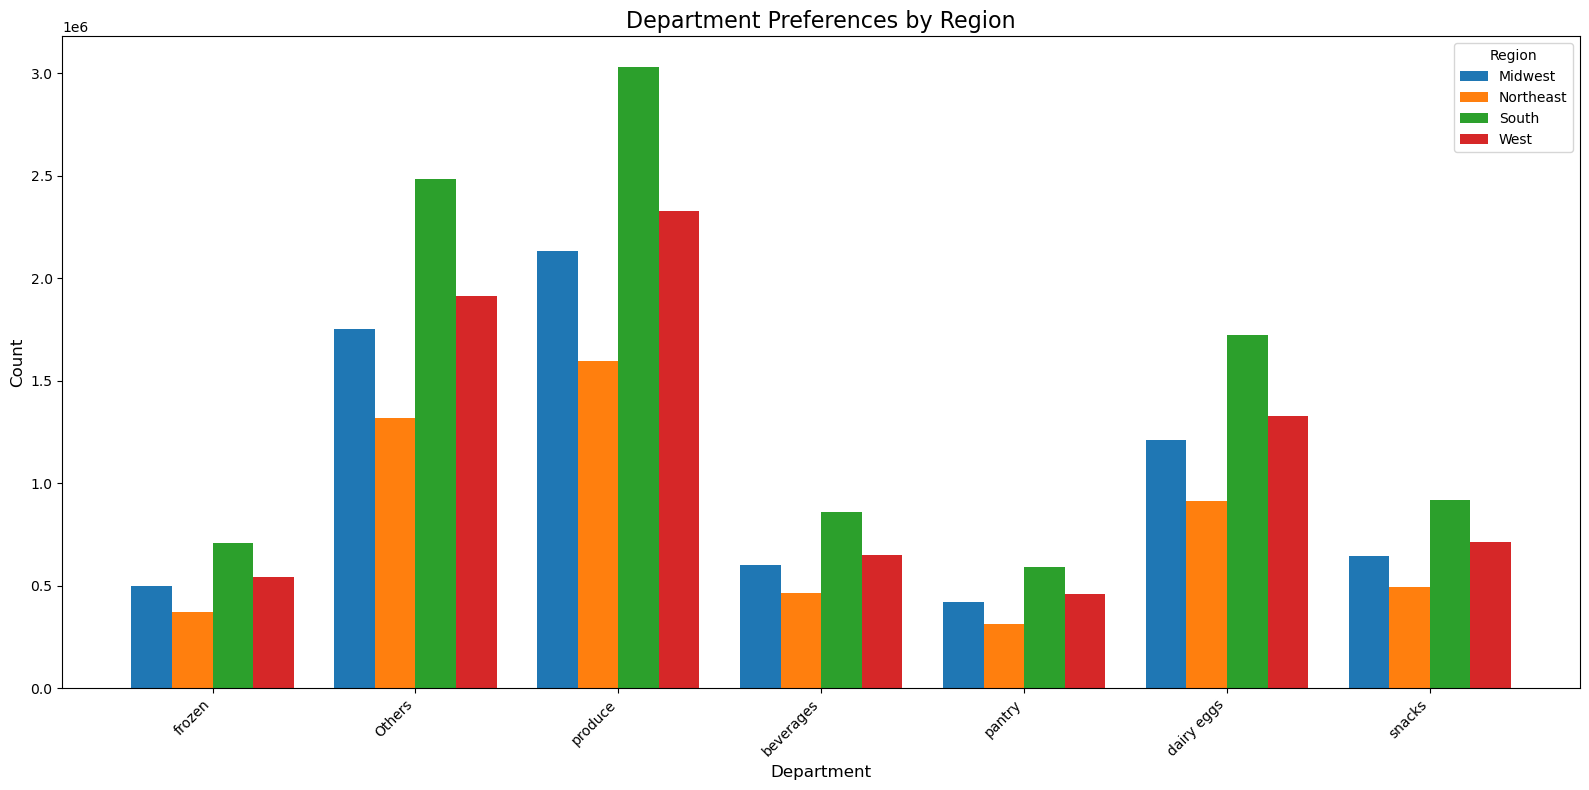

Grouped bar chart saved successfully at: C:\Users\cmfag\OneDrive\Desktop\Data Analyst Specialist\Achievement 4\04 Analysis\Visualizations\department_preferences_grouped_bar_chart.png


In [308]:

# Group by region and department to calculate counts
region_department_counts = (
    df_combined_filtered_reduced.groupby(['Region', 'department']).size().reset_index(name='count')
)

# Pivot the data for grouped bar chart
pivot_data = region_department_counts.pivot(index='department', columns='Region', values='count').fillna(0)

# Create the grouped bar chart
regions = pivot_data.columns
departments = pivot_data.index
x = np.arange(len(departments))  # Position of departments on the x-axis
bar_width = 0.2  # Width of each bar

plt.figure(figsize=(16, 8))

# Plot each region as a separate set of bars
for i, region in enumerate(regions):
    plt.bar(x + i * bar_width, pivot_data[region], width=bar_width, label=region)

# Add labels, title, and legend
plt.xlabel('Department', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Department Preferences by Region', fontsize=16)
plt.xticks(x + bar_width * (len(regions) - 1) / 2, departments, rotation=45, ha='right')
plt.legend(title='Region', fontsize=10)
plt.tight_layout()

# Save the graph
output_path = r"C:\Users\cmfag\OneDrive\Desktop\Data Analyst Specialist\Achievement 4\04 Analysis\Visualizations\department_preferences_grouped_bar_chart.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')

# Show the graph
plt.show()

print(f"Grouped bar chart saved successfully at: {output_path}")


### Insights 


##### 1. Regional Differences:
South: Shows the highest consumption in the "produce" (fresh products) and "dairy eggs" (dairy and eggs) departments.

Northeast and Midwest: While they share similar overall patterns, there are noticeable differences in specific departments like "others."

West: Stands out for its significant contribution to "produce" but shows lower consumption in other departments.

##### 2. Key Departments:
"Produce" is dominant across all regions, highlighting the importance of fresh produce to customers overall.
"Others" varies significantly by region, suggesting the presence of less common but locally significant products.

##### 3. Relative Variation:
While "produce" and "dairy eggs" lead in the number of orders, smaller departments like "snacks" and "beverages" still exhibit noticeable regional variations.


#### Next Steps:
Regional Investigation: Dive deeper into the "Others" department to identify specific products driving this category's consumption in each region.

Temporal Analysis: Compare this data with trends over time (day/hour) to uncover additional patterns.

Customer Segmentation: Integrating demographic data with this analysis could help link department preferences to specific customer profiles.

In [313]:
# Exporting data 


# Define the output path for the dataset
output_path = r"C:\Users\cmfag\OneDrive\Desktop\Data Analyst Specialist\Achievement 4\02 DATA\Prepared Data\df_combined_filtered_reduced.pkl"

# Export the DataFrame to a pickle file
df_combined_filtered_reduced.to_pickle(output_path)

print(f"Dataset successfully saved to: {output_path}")


Dataset successfully saved to: C:\Users\cmfag\OneDrive\Desktop\Data Analyst Specialist\Achievement 4\02 DATA\Prepared Data\df_combined_filtered_reduced.pkl


# Other Graphs

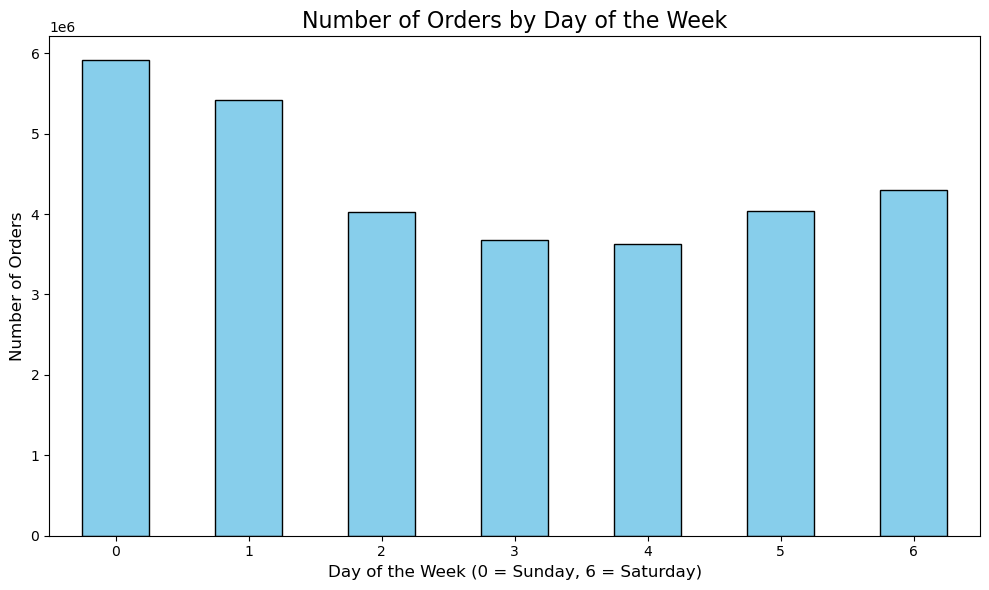

Graph saved successfully!


In [15]:
# Generate the plot
order_days = df_combined_filtered_reduced['order_dow'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
order_days.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Orders by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week (0 = Sunday, 6 = Saturday)', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()

# Save the plot to the specified folder
output_path = r"C:\Users\cmfag\OneDrive\Desktop\Data Analyst Specialist\Achievement 4\04 Analysis\Visualizations\Visualizations"
plt.savefig(f"{output_path}\\busiest_days_of_week.png", format='png', dpi=300)
plt.show()

print("Graph saved successfully!")



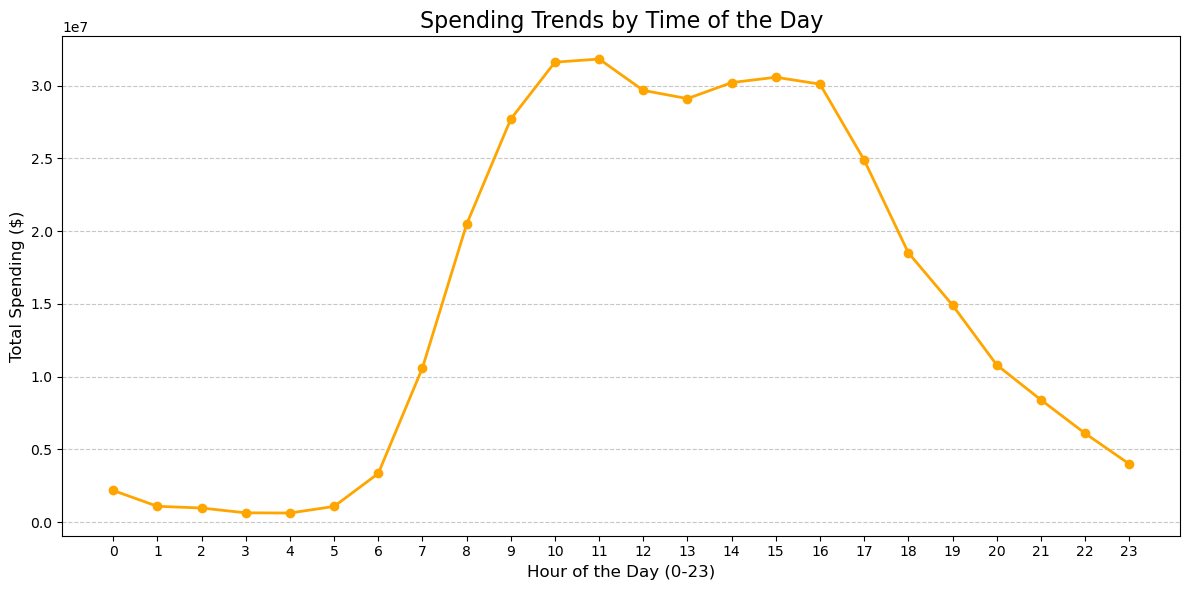

Graph for Spending Trends by Time of the Day saved successfully!


In [17]:
# Calculate total spending by hour of the day
spending_trends = df_combined_filtered_reduced.groupby('order_hour_of_day')['prices'].sum()

# Create a plot
plt.figure(figsize=(12, 6))
spending_trends.plot(kind='line', marker='o', color='orange', linewidth=2)
plt.title('Spending Trends by Time of the Day', fontsize=16)
plt.xlabel('Hour of the Day (0-23)', fontsize=12)
plt.ylabel('Total Spending ($)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(0, 24), fontsize=10)
plt.tight_layout()

# Save the graph
output_path = r"C:\Users\cmfag\OneDrive\Desktop\Data Analyst Specialist\Achievement 4\04 Analysis\Visualizations\Visualizations"
plt.savefig(f"{output_path}\\spending_trends_by_time_of_day.png", format='png', dpi=300)

# Show the plot
plt.show()

print("Graph for Spending Trends by Time of the Day saved successfully!")


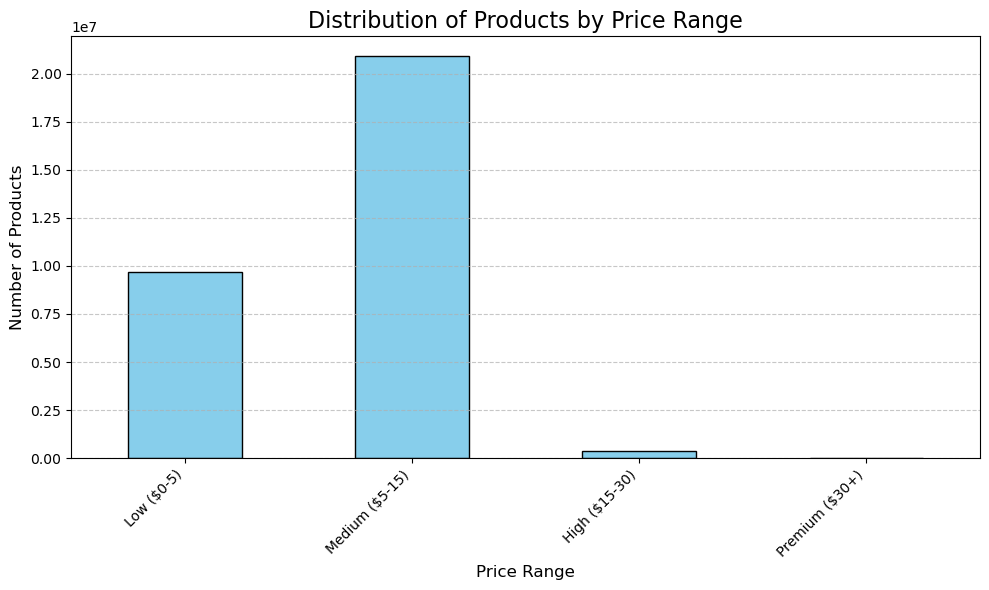

Graph for Distribution of Products by Price Range saved successfully!


In [19]:
# Categorize prices into price ranges
price_bins = [0, 5, 15, 30, 100]  # Define bins (you can adjust these ranges as needed)
price_labels = ['Low ($0-5)', 'Medium ($5-15)', 'High ($15-30)', 'Premium ($30+)']  # Labels for bins
df_combined_filtered_reduced['price_range'] = pd.cut(df_combined_filtered_reduced['prices'], bins=price_bins, labels=price_labels, include_lowest=True)

# Count the number of products in each price range
price_range_counts = df_combined_filtered_reduced['price_range'].value_counts().sort_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
price_range_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Products by Price Range', fontsize=16)
plt.xlabel('Price Range', fontsize=12)
plt.ylabel('Number of Products', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the graph
output_path = r"C:\Users\cmfag\OneDrive\Desktop\Data Analyst Specialist\Achievement 4\04 Analysis\Visualizations\Visualizations"
plt.savefig(f"{output_path}\\distribution_of_products_by_price_range.png", format='png', dpi=300)

# Show the plot
plt.show()

print("Graph for Distribution of Products by Price Range saved successfully!")
